 BRAIN TUMOR DETECTION PROJECT 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Prepare/collect data

In [18]:
import os

path = os.listdir('C:/Users/KIIT/OneDrive/Pictures/brain tumor detection project/Training/')
classes = {'no_tumor':0, 'pituitary_tumor':1}

In [19]:
import cv2
X = []
Y = []
for cls in classes:
    pth = 'C:/Users/KIIT/OneDrive/Pictures/brain tumor detection project/Training/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])

In [20]:
X = np.array(X)
Y = np.array(Y)

X_updated = X.reshape(len(X), -1)

In [21]:
np.unique(Y)

array([0, 1])

In [8]:
pd.Series(Y).value_counts()

1    827
0    395
dtype: int64

In [9]:
X.shape, X_updated.shape

((1222, 200, 200), (1222, 40000))

### Visualize data

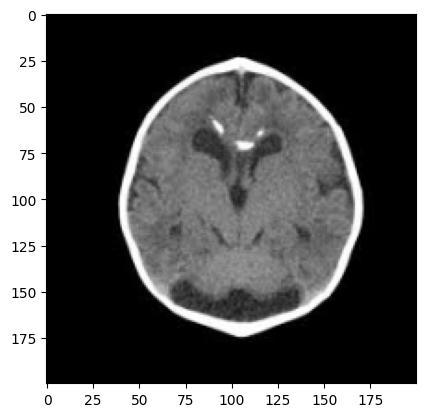

In [23]:
plt.imshow(X[10], cmap='gray')

### Prepare data

In [24]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(1222, 40000)

### Split Data

In [25]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10,
                                               test_size=.20)

In [26]:
xtrain.shape, xtest.shape

((977, 40000), (245, 40000))

### Feature Scaling

In [27]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


### Feature Selection: PCA

In [28]:
from sklearn.decomposition import PCA

In [29]:
print(xtrain.shape, xtest.shape)

pca = PCA(.98)
# pca_train = pca.fit_transform(xtrain)
# pca_test = pca.transform(xtest)
pca_train = xtrain
pca_test = xtest

(977, 40000) (245, 40000)


In [ ]:
# print(pca_train.shape, pca_test.shape)
# print(pca.n_components_)
# print(pca.n_features_)

### Training the Model

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [31]:
import warnings
warnings.filterwarnings('ignore')

lg = LogisticRegression(C=0.1)
lg.fit(xtrain, ytrain)


LogisticRegression(C=0.1)

In [32]:
sv = SVC()
sv.fit(xtrain, ytrain)

SVC()

### Evaluation

In [33]:
print("Training Score:", lg.score(xtrain, ytrain))
print("Testing Score:", lg.score(xtest, ytest))

Training Score: 1.0
Testing Score: 0.9591836734693877


In [34]:
print("Training Score:", sv.score(xtrain, ytrain))
print("Testing Score:", sv.score(xtest, ytest))

Training Score: 0.9938587512794268
Testing Score: 0.963265306122449


### Prediction

In [35]:
pred = sv.predict(xtest)


In [36]:
misclassified=np.where(ytest!=pred)
misclassified

(array([ 36,  51,  68, 120, 212, 214, 220, 227, 239], dtype=int64),)

In [40]:
print("Total Misclassified Samples: ",len(misclassified[0]))
print(pred[36],ytest[51])

Total Misclassified Samples:  9
0 0


### TEST MODEL

In [41]:
dec = {0:'No Tumor', 1:'Positive Tumor'}

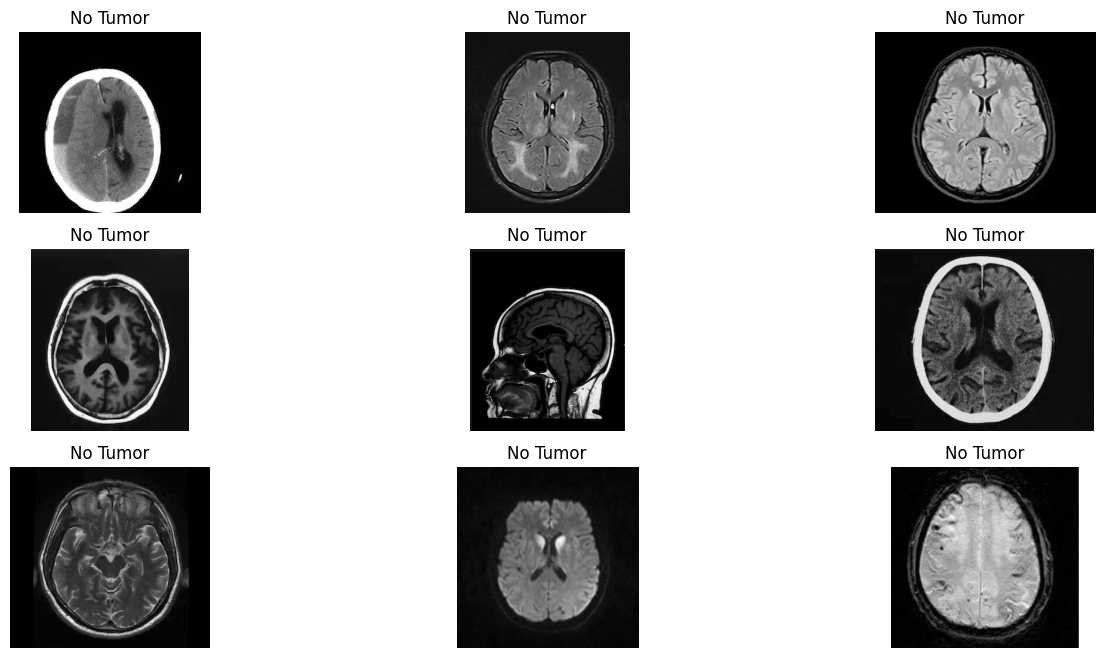

In [45]:
plt.figure(figsize=(16,8))
p = os.listdir('C:/Users/KIIT/OneDrive/Pictures/brain tumor detection project/Testing/no_tumor/')
c=1
for i in os.listdir('C:/Users/KIIT/OneDrive/Pictures/brain tumor detection project/Testing/no_tumor/')[:9]:
    plt.subplot(3,3,c)
    
    img = cv2.imread('C:/Users/KIIT/OneDrive/Pictures/brain tumor detection project/Testing/no_tumor/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

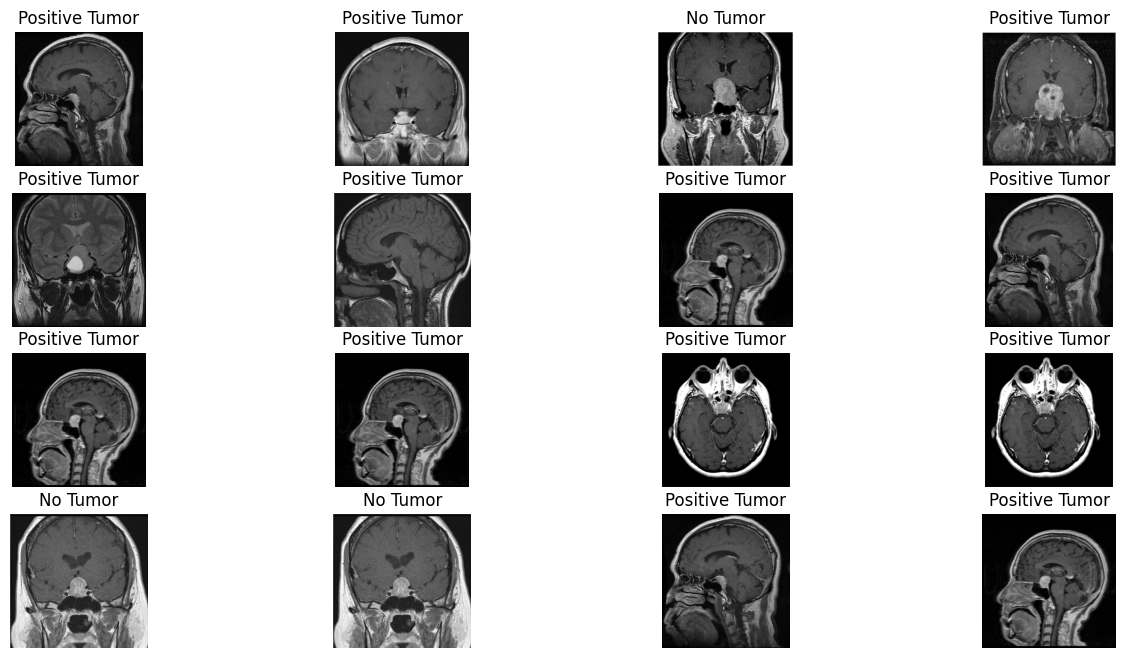

In [46]:
plt.figure(figsize=(16,8))
p = os.listdir('C:/Users/KIIT/OneDrive/Pictures/brain tumor detection project/Testing/')
c=1
for i in os.listdir('C:/Users/KIIT/OneDrive/Pictures/brain tumor detection project/Testing/pituitary_tumor/')[:16]:
    plt.subplot(4,4,c)
    
    img = cv2.imread('C:/Users/KIIT/OneDrive/Pictures/brain tumor detection project/Testing/pituitary_tumor/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1